## Getting data out of the database

In [1]:
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 2.7MB/s 


In [0]:
import numpy as np
import pandas as pd
import psycopg2 as ps

In [6]:
host_name = 'adv-ml-db.ben-fogarty.com'
dbname = 'postgres'
port = '5432'
user_name = 'readerwriter'
pwd = '35ZH@q&hajeU'

try:
    conn = ps.connect(host=host_name,database=dbname,user=user_name,password=pwd,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

OperationalError: ignored

In [0]:
cur = conn.cursor()
cur.execute(""" 
            SELECT * FROM raw_data; 
            """)
data = cur.fetchall()
colnames = [desc[0] for desc in cur.description] 
conn.commit()

#create the pandas dataframe
df = pd.DataFrame(data)
df.columns = colnames

#close the connection
cur.close()

In [0]:
df.head()

dab_id  alj_id                                           dab_text  \
0   2989  CR5483  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
1   2988  CR5424  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
2   2987  CR5446  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
3   2986  CR5457  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
4   2985  CR5076  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   

                                            alj_text  \
0  DECISION The Inspector General of the United S...   
1  DECISION Petitioner, Edwin L. Fuentes, is excl...   
2  DECISION The Inspector General (IG) of the Dep...   
3  DECISION Petitioner, Richard R. Jimenez, was l...   
4  DECISION I grant summary judgment sustaining t...   

                                             dab_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                             alj_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                       decision_text  decision_binary  
0  For the reasons stated above, we affirm the AL...              0.0  
1  For the reasons stated above, we affirm the AL...              0.0  
2                The Board affirms the ALJ Decision.              0.0  
3                        We affirm the ALJ Decision.              0.0  
4  For the reasons discussed above, we affirm the...              0.0

In [0]:
df.to_csv('df.csv', index=False)

In [0]:
!pip install spacy

     |████████████████████████████████| 10.5 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 20.2 MB/s eta 0:00:01


In [0]:
!pip install torchtext

     |████████████████████████████████| 64 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 80.5 MB 234 kB/s  eta 0:00:01     |█████████████▋                  | 34.2 MB 13.0 MB/s eta 0:00:04     |███████████████                 | 37.9 MB 13.0 MB/s eta 0:00:04     |███████████████████████████████▌| 79.3 MB 10.8 MB/s eta 0:00:01


In [0]:
import spacy
from torchtext import data

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
def tokenize_fct(text):  # create a tokenizer function
    if text:
        return [tok.lemma_ for tok in nlp.tokenizer(text) if not tok.is_stop and not tok.is_punct]
    else:
        return ''

## for making torchtext data to actually pass into neural network

In [0]:
TEXT = data.Field(sequential=True, tokenize=tokenize_fct)
LABEL = data.Field(sequential=False, use_vocab=False)

In [0]:
from torchtext.data import TabularDataset

In [0]:
df.head()

dab_id  alj_id                                           dab_text  \
0   2989  CR5483  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
1   2988  CR5424  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
2   2987  CR5446  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
3   2986  CR5457  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
4   2985  CR5076  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   

                                            alj_text  \
0  DECISION The Inspector General of the United S...   
1  DECISION Petitioner, Edwin L. Fuentes, is excl...   
2  DECISION The Inspector General (IG) of the Dep...   
3  DECISION Petitioner, Richard R. Jimenez, was l...   
4  DECISION I grant summary judgment sustaining t...   

                                             dab_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                             alj_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                       decision_text  decision_binary  
0  For the reasons stated above, we affirm the AL...              0.0  
1  For the reasons stated above, we affirm the AL...              0.0  
2                The Board affirms the ALJ Decision.              0.0  
3                        We affirm the ALJ Decision.              0.0  
4  For the reasons discussed above, we affirm the...              0.0

In [0]:
tv_datafields = [("dab_id", None), ("alj_id", None), 
                 ("dab_text", TEXT), ("alj_text", TEXT),
                 ("dab_url", None), ("alj_url", None),
                 ("decision_text", TEXT), ("decision_binary", LABEL)]

In [0]:
trn = TabularDataset(
           path="df.csv", # the file path
           format='csv',
           skip_header=True, # if your csv header has a header, make sure to pass this to ensure it doesn't get proceesed as data!
           fields=tv_datafields)

In [0]:
trn

## just for generating summary stats for mid-quarter presentation

In [0]:
df_cleaned = df.copy()

In [0]:
df_cleaned['dab_lemmas'] = df_cleaned['dab_text'].apply(tokenize_fct)

In [0]:
df_cleaned.head()

dab_id  alj_id                                           dab_text  \
0   2989  CR5483  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
1   2988  CR5424  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
2   2987  CR5446  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
3   2986  CR5457  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
4   2985  CR5076  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   

                                            alj_text  \
0  DECISION The Inspector General of the United S...   
1  DECISION Petitioner, Edwin L. Fuentes, is excl...   
2  DECISION The Inspector General (IG) of the Dep...   
3  DECISION Petitioner, Richard R. Jimenez, was l...   
4  DECISION I grant summary judgment sustaining t...   

                                             dab_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                             alj_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                       decision_text  decision_binary  \
0  For the reasons stated above, we affirm the AL...              0.0   
1  For the reasons stated above, we affirm the AL...              0.0   
2                The Board affirms the ALJ Decision.              0.0   
3                        We affirm the ALJ Decision.              0.0   
4  For the reasons discussed above, we affirm the...              0.0   

                                          dab_lemmas  
0  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...  
1  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...  
2  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...  
3  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...  
4  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...

Summary stat stuff to include:

* length of text
* word frequencies
* n-gram frequencies

### length of text

In [0]:
def get_length(text):
    if text:
        return len(nlp.tokenizer(text))
    else:
        return 0

In [0]:
df_cleaned['dab_length'] = df_cleaned['dab_text'].apply(get_length)
df_cleaned['alj_length'] = df_cleaned['alj_text'].apply(get_length)

In [0]:
df_cleaned.head()

dab_id  alj_id                                           dab_text  \
0   2989  CR5483  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
1   2988  CR5424  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
2   2987  CR5446  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
3   2986  CR5457  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   
4   2985  CR5076  FINAL DECISION ON REVIEW OF ADMINISTRATIVE LAW...   

                                            alj_text  \
0  DECISION The Inspector General of the United S...   
1  DECISION Petitioner, Edwin L. Fuentes, is excl...   
2  DECISION The Inspector General (IG) of the Dep...   
3  DECISION Petitioner, Richard R. Jimenez, was l...   
4  DECISION I grant summary judgment sustaining t...   

                                             dab_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                             alj_url  \
0  https://www.hhs.gov/about/agencies/dab/decisio...   
1  https://www.hhs.gov/about/agencies/dab/decisio...   
2  https://www.hhs.gov/about/agencies/dab/decisio...   
3  https://www.hhs.gov/about/agencies/dab/decisio...   
4  https://www.hhs.gov/about/agencies/dab/decisio...   

                                       decision_text  decision_binary  \
0  For the reasons stated above, we affirm the AL...              0.0   
1  For the reasons stated above, we affirm the AL...              0.0   
2                The Board affirms the ALJ Decision.              0.0   
3                        We affirm the ALJ Decision.              0.0   
4  For the reasons discussed above, we affirm the...              0.0   

                                          dab_lemmas  dab_length  alj_length  
0  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...        5696        3755  
1  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...       10569        7112  
2  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...        3206        4089  
3  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...        2981        3708  
4  [FINAL, DECISION, REVIEW, ADMINISTRATIVE, LAW,...       10209        3466

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


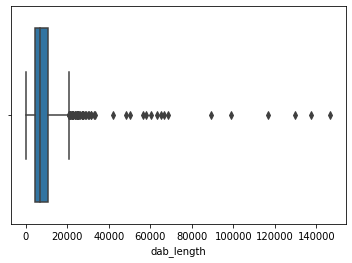

In [0]:
sns.boxplot(df_cleaned['dab_length'])

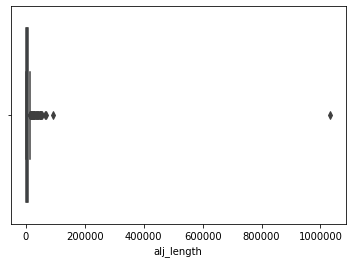

In [0]:
sns.boxplot(df_cleaned['alj_length'])

In [0]:
df_cleaned[df_cleaned['alj_length'] > 200000]

dab_id alj_id                                           dab_text  \
1273   1728  CR620   FINAL DECISION ON REVIEW OF          ADMINIST...   

                                               alj_text  \
1273    Department of Health and Human Services    D...   

                                                dab_url  \
1273  https://www.hhs.gov/sites/default/files/static...   

                                                alj_url decision_text  \
1273  https://www.hhs.gov/sites/default/files/static...      That St.   

      decision_binary                                         dab_lemmas  \
1273              NaN  [  , FINAL, DECISION, REVIEW,          , ADMIN...   

      dab_length  alj_length  
1273      116716     1033252

In [0]:
list(df_cleaned[df_cleaned['dab_id'] == '1728']['alj_url'])

['https://www.hhs.gov/sites/default/files/static/dab/decisions/alj-decisions/1999/cr620.htm']

In [0]:
list(df_cleaned[df_cleaned['dab_id'] == '1728']['alj_text'])

['  Department of Health and Human Services    DEPARTMENTAL APPEALS BOARD    Civil Remedies Division  I decide that the Inspector General (I.G.) proved by a preponderance          of the evidence that Respondent, St. Anthony Hospital, refused to accept          an appropriate transfer of a patient in contravention of section 1867(g)          of the Social Security Act (Act). I impose a civil money penalty against          Respondent in the amount of $25,000.I. BACKGROUNDThe case has its genesis in events that occurred on April 8, 1995. On          the afternoon of that day, an individual, R.M., was involved in an automobile          accident on a highway outside of Oklahoma City, Oklahoma. R.M. was brought          to the emergency room of Shawnee Regional Hospital, a local hospital.          At Shawnee Regional Hospital, R.M. was at first diagnosed to be suffering          from a neurological injury. However, it became apparent eventually that          R.M.\'s primary injury was to hi

### word/n-gram frequencies

In [0]:
!pip install nltk

In [0]:
from nltk import FreqDist
from nltk.util import ngrams, bigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [0]:
tst = df.iloc[0]['dab_text']

In [0]:
tst_tokens = tst.lower().split()

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/compileherlaptop/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
tst_tokens_filt = [w for w in tst_tokens if not w in stop_words]

In [0]:
FreqDist(bigrams(tst.lower().split()))

FreqDist({('the', 'alj'): 46, ('that', 'the'): 44, ('of', 'the'): 40, ('to', 'the'): 30, ('id.', 'at'): 27, ('the', 'ag'): 27, ('in', 'the'): 24, ('of', 'a'): 23, ('.', '.'): 22, ('the', 'i.g.'): 19, ...})

In [0]:
word_fd = FreqDist(tst_tokens_filt)
bigram_fd = FreqDist(bigrams(tst_tokens_filt))

In [0]:
bigram_fd.most_common()

[(('.', '.'), 22),
 (('ag', 'memo'), 19),
 (('dab', 'no.'), 15),
 (('health', 'care'), 14),
 (('i.g.', 'ex.'), 13),
 (('alj', 'decision'), 12),
 (('delivery', 'health'), 10),
 (('care', 'item'), 10),
 (('42', 'c.f.r.'), 10),
 (('c.f.r.', '§'), 10),
 (('connection', 'delivery'), 9),
 (('written', 'direct'), 9),
 (('section', '1128(a)(2)'), 8),
 (('alj', 'err'), 8),
 (('related', 'neglect'), 7),
 (('five', 'years'), 7),
 (('alj', 'found'), 7),
 (('criminal', 'offense'), 6),
 (('neglect', 'abuse'), 6),
 (('(citing', 'i.g.'), 6),
 (('ex.', '2,'), 6),
 (('april', '20,'), 6),
 (('petitioner', 'also'), 6),
 (('argues', 'alj'), 6),
 (('period', 'five'), 5),
 (('petitioner’s', 'arguments'), 5),
 (('.', '.”'), 5),
 (('id.', '(citing'), 5),
 (('conviction', 'related'), 5),
 (('aag', 'declaration'), 5),
 (('exclude', 'petitioner'), 5),
 (('see', 'also'), 5),
 (('federal', 'health'), 4),
 (('care', 'programs'), 4),
 (('item', 'service.”'), 4),
 (('minimum', 'period'), 4),
 (('id.', '3.'), 4),
 (('i

In [0]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/compileherlaptop/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
bigramfdist = FreqDist()
wordfdist = FreqDist()

In [0]:
def get_ngrams(text, n, freq_count):
    tokens = word_tokenize(text.lower())
    tokens_filt = [tok for tok in tokens if tok.isalpha()]
    bigrams = ngrams(text.split(), n)
    freq_count.update(bigrams)

In [0]:
get_ngrams(tst, 2, bigramfdist)

In [0]:
bigramfdist

FreqDist({('that', 'the'): 44, ('of', 'the'): 40, ('to', 'the'): 30, ('the', 'ALJ'): 29, ('the', 'AG'): 27, ('Id.', 'at'): 24, ('of', 'a'): 23, ('in', 'the'): 23, ('.', '.'): 22, ('AG', 'Memo'): 19, ...})

In [0]:
get_ngrams(tst, 1, wordfdist)

In [0]:
wordfdist

FreqDist({('the',): 365, ('of',): 149, ('to',): 124, ('that',): 96, ('a',): 85, ('in',): 77, ('at',): 75, ('petitioner',): 67, ('and',): 67, ('alj',): 61, ...})

In [0]:
bigramfdist.most_common()

[((final, decision), 1),
 ((decision, on), 1),
 ((on, review), 1),
 ((review, of), 1),
 ((of, administrative), 1),
 ((administrative, law), 1),
 ((law, judge), 1),
 ((judge, decision), 1),
 ((decision, nancy), 1),
 ((nancy, l.), 1),
 ((l., clark), 1),
 ((clark, (), 1),
 (((, petitioner), 1),
 ((petitioner, )), 1),
 ((), appeals), 1),
 ((appeals, a), 1),
 ((a, decision), 1),
 ((decision, by), 1),
 ((by, an), 1),
 ((an, administrative), 1),
 ((administrative, law), 1),
 ((law, judge), 1),
 ((judge, (), 1),
 (((, alj), 1),
 ((alj, )), 1),
 ((), upholding), 1),
 ((upholding, on), 1),
 ((on, the), 1),
 ((the, written), 1),
 ((written, record), 1),
 ((record, the), 1),
 ((the, inspector), 1),
 ((inspector, general), 1),
 ((general, ’s), 1),
 ((’s, (), 1),
 (((, i.g), 1),
 ((i.g, .), 1),
 ((., )), 1),
 ((), exclusion), 1),
 ((exclusion, of), 1),
 ((of, petitioner), 1),
 ((petitioner, from), 1),
 ((from, participation), 1),
 ((participation, in), 1),
 ((in, all), 1),
 ((all, federal), 1),
 ((f

In [0]:
wordfdist.most_common()

[((final,), 1),
 ((decision,), 1),
 ((on,), 1),
 ((review,), 1),
 ((of,), 1),
 ((administrative,), 1),
 ((law,), 1),
 ((judge,), 1),
 ((decision,), 1),
 ((nancy,), 1),
 ((l.,), 1),
 ((clark,), 1),
 (((,), 1),
 ((petitioner,), 1),
 ((),), 1),
 ((appeals,), 1),
 ((a,), 1),
 ((decision,), 1),
 ((by,), 1),
 ((an,), 1),
 ((administrative,), 1),
 ((law,), 1),
 ((judge,), 1),
 (((,), 1),
 ((alj,), 1),
 ((),), 1),
 ((upholding,), 1),
 ((on,), 1),
 ((the,), 1),
 ((written,), 1),
 ((record,), 1),
 ((the,), 1),
 ((inspector,), 1),
 ((general,), 1),
 ((’s,), 1),
 (((,), 1),
 ((i.g,), 1),
 ((.,), 1),
 ((),), 1),
 ((exclusion,), 1),
 ((of,), 1),
 ((petitioner,), 1),
 ((from,), 1),
 ((participation,), 1),
 ((in,), 1),
 ((all,), 1),
 ((federal,), 1),
 ((health,), 1),
 ((care,), 1),
 ((programs,), 1),
 ((for,), 1),
 ((a,), 1),
 ((period,), 1),
 ((of,), 1),
 ((five,), 1),
 ((years,), 1),
 ((.,), 1),
 (( ,), 1),
 ((nancy,), 1),
 ((l.,), 1),
 ((clark,), 1),
 ((,,), 1),
 ((dab,), 1),
 ((cr5483,), 1),
 (((,